In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import linregress

# Machine Learing Libraries
from statsmodels.tsa.stattools import pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Corelation Between Chhattisgarh vs Madhya Pradesh

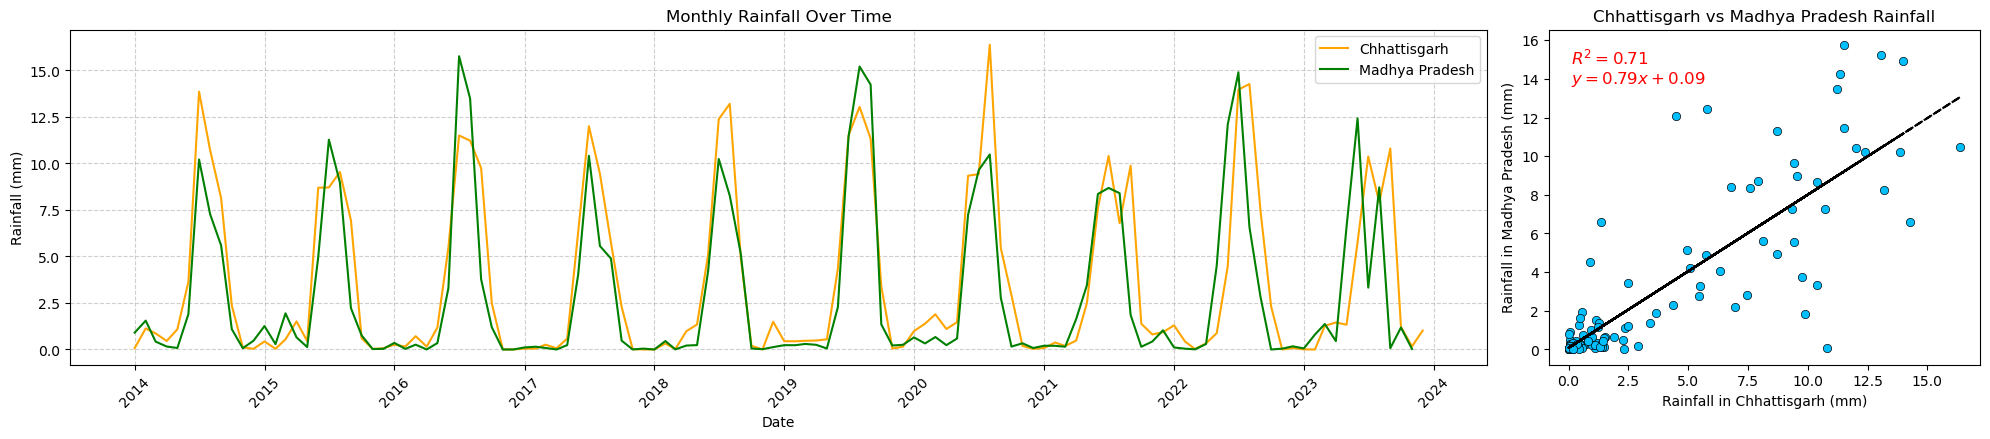

In [2]:
# Load your datasets
df1 = pd.read_csv("C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/monthly_cg.csv", parse_dates=['Date'], index_col='Date')
df2 = pd.read_csv("C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/monthly_mp.csv", parse_dates=['Date'], index_col='Date')

# Merge the two datasets to ensure alignment on the date
df_combined = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_CG', '_MP'))

# Extract rainfall columns for regression analysis
x = df_combined['Rainfall_CG']
y = df_combined['Rainfall_MP']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)


# Start a new figure with side-by-side subplots
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2, 4)

# Line plot for rainfall over time
ax1 = fig.add_subplot(gs[0, :3])
ax1.plot(df1.index, df1['Rainfall'], color='orange', label='Chhattisgarh')
ax1.plot(df2.index, df2['Rainfall'], color='green', label='Madhya Pradesh')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall (mm)')
ax1.set_title('Monthly Rainfall Over Time')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.tick_params(axis='x', rotation=45)

# Scatter plot for Chhattisgarh vs. Madhya Pradesh rainfall with regression line
ax2 = fig.add_subplot(gs[0, 3:])
sns.scatterplot(x=x, y=y, color='deepskyblue', edgecolor='black', ax=ax2)
ax2.plot(x, slope * x + intercept, color='black', linestyle='--')  # Regression line
ax2.set_xlabel('Rainfall in Chhattisgarh (mm)')
ax2.set_ylabel('Rainfall in Madhya Pradesh (mm)')
ax2.set_title('Chhattisgarh vs Madhya Pradesh Rainfall')

# Annotate R-squared and regression equation on the scatter plot
ax2.text(
    0.05, 0.95, f'$R^2 = {r_value**2:.2f}$\n$y = {slope:.2f}x + {intercept:.2f}$',
    transform=ax2.transAxes, fontsize=12, verticalalignment='top', color='red'
)

# Adjust layout to fit elements properly
plt.tight_layout()
plt.show()

In [32]:
# Import rainfall data 
df = pd.read_csv(
    "C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/monthly_mp.csv",
    parse_dates=['Date'],  # Indicate that 'Date' should be parsed as a date
    index_col='Date'       # Set 'Date' as the index
)

# Display the first few rows
print(df.head())

            Rainfall
Date                
2014-01-01  0.905806
2014-02-01  1.550714
2014-03-01  0.421935
2014-04-01  0.159667
2014-05-01  0.079677


C:\Users\somil\AppData\Local\Temp\ipykernel_34352\1577269018.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)


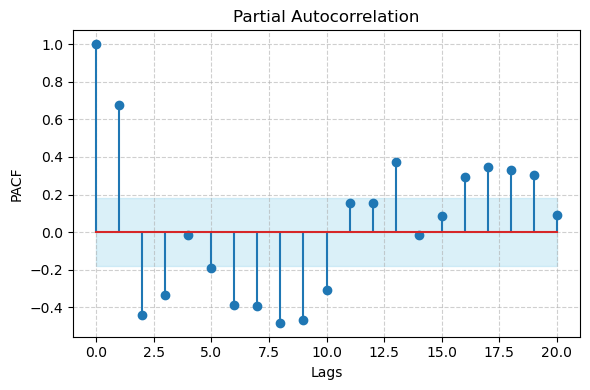

In [33]:
# Calculate partial autocorrelation for the time series
pacf_values = pacf(df1['Rainfall'], nlags=20)  # 'nlags' defines the number of lags to compute

# Define the 95% confidence interval for PACF
conf_int = 1.96 / np.sqrt(len(df['Rainfall']))

# Plot PACF with 95% confidence interval
plt.figure(figsize=(6, 4))
plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)
plt.fill_between(range(len(pacf_values)), conf_int, -conf_int, color='skyblue', alpha=0.3)
plt.title('Partial Autocorrelation')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Feature engineering

In [34]:
# Feature engineering: add lag features (previous day rainfall as feature)
df['lag_1'] = df['Rainfall'].shift(1)
df['lag_2'] = df['Rainfall'].shift(2)
df['lag_3'] = df['Rainfall'].shift(3)

# Drop missing values created by the shift
df = df.dropna()

# Display the first few rows after adding lag features
print(df.head())

             Rainfall      lag_1     lag_2     lag_3
Date                                                
2014-04-01   0.159667   0.421935  1.550714  0.905806
2014-05-01   0.079677   0.159667  0.421935  1.550714
2014-06-01   1.897333   0.079677  0.159667  0.421935
2014-07-01  10.212903   1.897333  0.079677  0.159667
2014-08-01   7.280645  10.212903  1.897333  0.079677


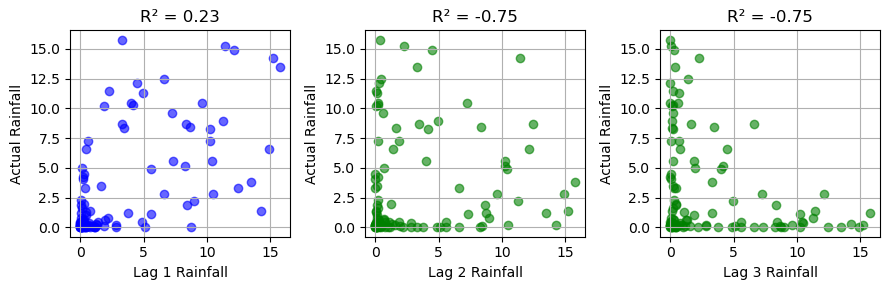

In [35]:
# Calculate R-squared values
r2_lag1 = r2_score(df['Rainfall'], df['lag_1'])
r2_lag2 = r2_score(df['Rainfall'], df['lag_2'])
r2_lag3 = r2_score(df['Rainfall'], df['lag_3'])

# Set figure size in centimeters (8x8 cm)
fig, axes = plt.subplots(1, 3, figsize=(9, 3))  # Convert cm to inches

# Scatter plot for Actual vs. Lag 1
axes[0].scatter(df['lag_1'], df['Rainfall'], color='blue', alpha=0.6)
axes[0].set_title(f"R² = {r2_lag1:.2f}")
axes[0].set_xlabel("Lag 1 Rainfall")
axes[0].set_ylabel("Actual Rainfall")
axes[0].grid(True)

# Scatter plot for Actual vs. Lag 2
axes[1].scatter(df['lag_2'], df['Rainfall'], color='green', alpha=0.6)
axes[1].set_title(f"R² = {r2_lag2:.2f}")
axes[1].set_xlabel("Lag 2 Rainfall")
axes[1].set_ylabel("Actual Rainfall")
axes[1].grid(True)

# Scatter plot for Actual vs. Lag 3
axes[2].scatter(df['lag_3'], df['Rainfall'], color='green', alpha=0.6)
axes[2].set_title(f"R² = {r2_lag2:.2f}")
axes[2].set_xlabel("Lag 3 Rainfall")
axes[2].set_ylabel("Actual Rainfall")
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [36]:
# Calculate the split index (80% for training)
split_index = int(len(df) * 0.8)

# Split the features (X) and target (y)
X = df[['lag_1', 'lag_2', 'lag_3']]  # Features: lagged rainfall values
y = df['Rainfall']  # Target: actual rainfall values

# Split the data into training and testing sets based on time
X_train = X[:split_index]  # First 80% of lag features for training
y_train = y[:split_index]  # First 80% of actual rainfall data for training
X_test = X[split_index:]  # Last 20% of lag features for testing
y_test = y[split_index:]  # Last 20% of actual rainfall data for testing


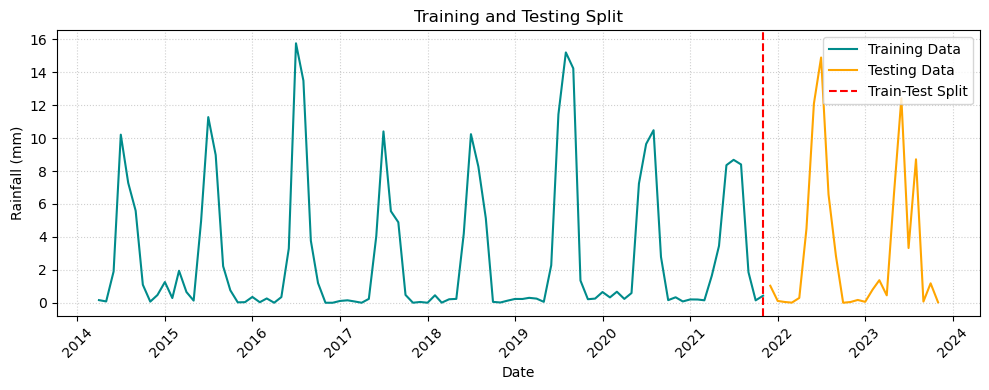

In [37]:
# Plot the training and testing data
plt.figure(figsize=(10, 4))
plt.plot(df.index[:split_index], y_train, color='darkcyan', label='Training Data')
plt.plot(df.index[split_index:], y_test, color='orange', label='Testing Data')
plt.axvline(x=df.index[split_index - 1], color='red', linestyle='--', label='Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Training and Testing Split')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout() 
plt.show()

## Linear Regression Model

Linear Regression:
Training RMSE: 2.734519746037993
Testing RMSE: 3.8798540916235598
Training R-squared: 0.5691804561226284
Testing R-squared: 0.24586845646851518


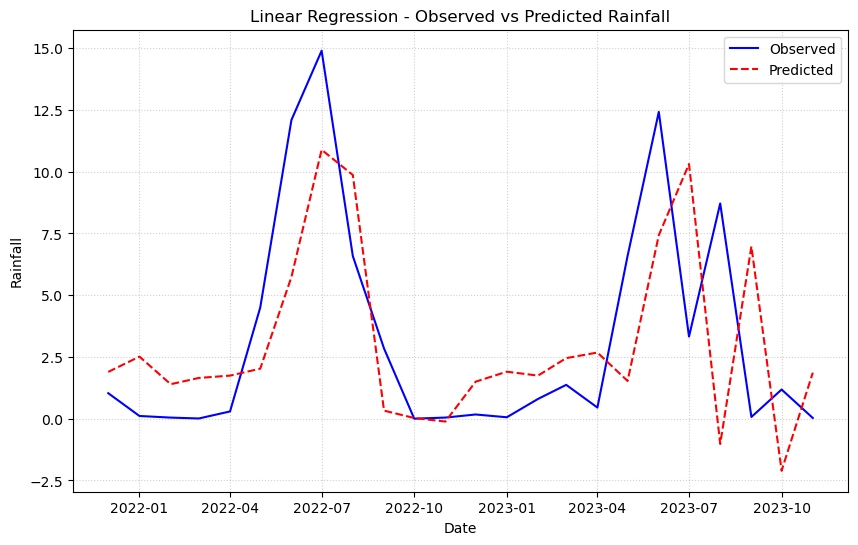

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# RMSE and R-squared for Linear Regression
y_pred_train_lr = lr_model.predict(X_train)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
train_r2_lr = r2_score(y_train, y_pred_train_lr)

# Print results for Linear Regression
print("Linear Regression:")
print(f"Training RMSE: {train_rmse_lr}")
print(f"Testing RMSE: {rmse_lr}")
print(f"Training R-squared: {train_r2_lr}")
print(f"Testing R-squared: {r2_lr}")

# Plot Linear Regression results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Observed', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predicted', color='red', linestyle='dashed')
plt.title('Linear Regression - Observed vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## Decision Tree Model


Decision Tree:
Training RMSE: 0.0
Testing RMSE: 3.238628427323451
Training R-squared: 1.0
Testing R-squared: 0.47454132443485886


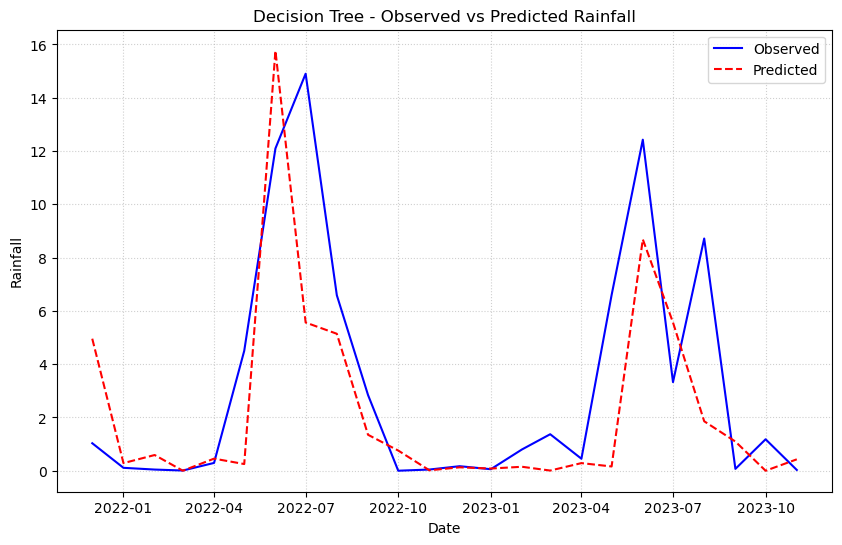

In [39]:
decision_tree = DecisionTreeRegressor().fit(X_train, y_train)

# Make predictions and evaluate
y_pred_train_tree = decision_tree.predict(X_train)
y_pred_test_tree = decision_tree.predict(X_test)

# RMSE and R-squared for Decision Tree
train_rmse_tree = np.sqrt(mean_squared_error(y_train, y_pred_train_tree))
test_rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_test_tree))
train_r2_tree = r2_score(y_train, y_pred_train_tree)
test_r2_tree = r2_score(y_test, y_pred_test_tree)

# Print results for Decision Tree
print("\nDecision Tree:")
print(f"Training RMSE: {train_rmse_tree}")
print(f"Testing RMSE: {test_rmse_tree}")
print(f"Training R-squared: {train_r2_tree}")
print(f"Testing R-squared: {test_r2_tree}")

# Plot Decision Tree results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Observed', color='blue')
plt.plot(y_test.index, y_pred_test_tree, label='Predicted', color='red', linestyle='dashed')
plt.title('Decision Tree - Observed vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## Random Forest Model


Random Forest:
Training RMSE: 0.9286624831577639
Testing RMSE: 2.85023822907152
Training R-squared: 0.9503122797721715
Testing R-squared: 0.5930147767689741


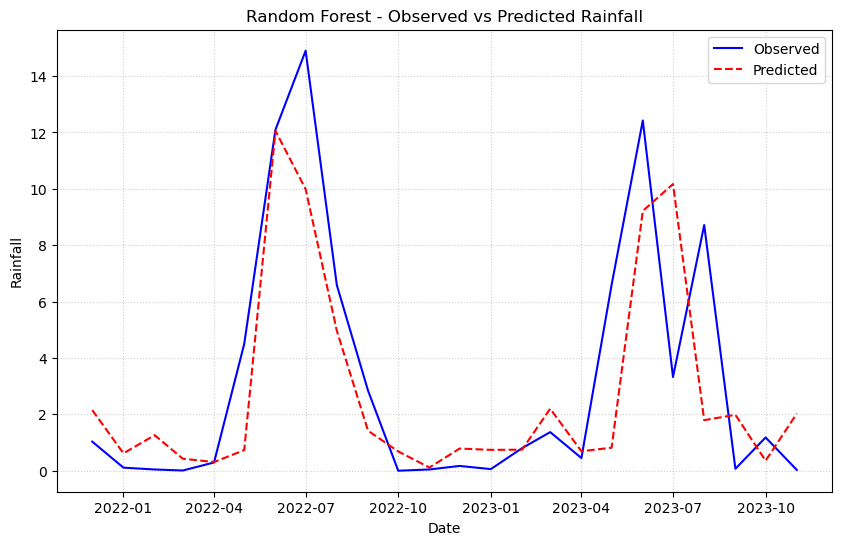

In [40]:
random_model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions and evaluate
y_pred_train_rf = random_model.predict(X_train)
y_pred_test_rf = random_model.predict(X_test)

# RMSE and R-squared for Random Forest
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print results for Random Forest
print("\nRandom Forest:")
print(f"Training RMSE: {train_rmse_rf}")
print(f"Testing RMSE: {test_rmse_rf}")
print(f"Training R-squared: {train_r2_rf}")
print(f"Testing R-squared: {test_r2_rf}")

# Plot Random Forest results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Observed', color='blue')
plt.plot(y_test.index, y_pred_test_rf, label='Predicted', color='red', linestyle='dashed')
plt.title('Random Forest - Observed vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## K-Nearest Neighbors Model


K-Nearest Neighbors:
Training RMSE: 1.902546418076726
Testing RMSE: 2.8432904847808604
Training R-squared: 0.7914530743774815
Testing R-squared: 0.594996493887185


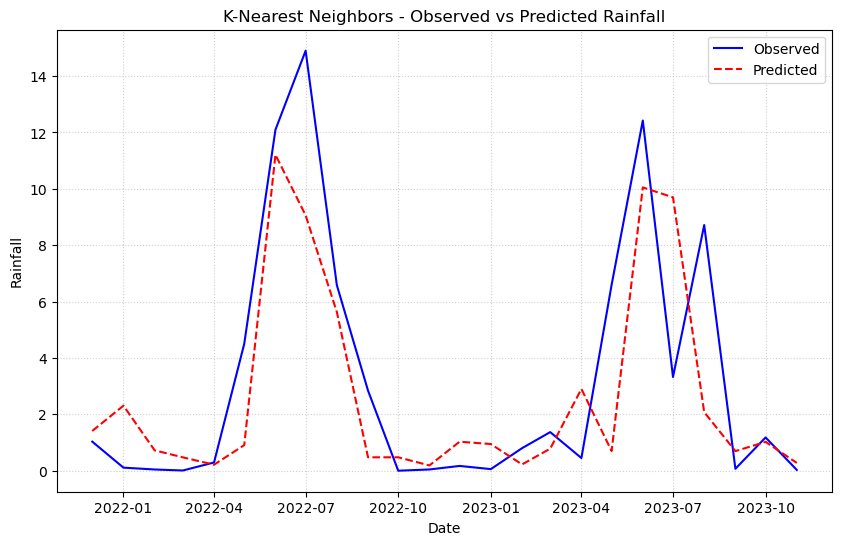

In [41]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

# Make predictions and evaluate
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# RMSE and R-squared for KNN
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_pred_train_knn))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))
train_r2_knn = r2_score(y_train, y_pred_train_knn)
test_r2_knn = r2_score(y_test, y_pred_test_knn)

# Print results for KNN
print("\nK-Nearest Neighbors:")
print(f"Training RMSE: {train_rmse_knn}")
print(f"Testing RMSE: {test_rmse_knn}")
print(f"Training R-squared: {train_r2_knn}")
print(f"Testing R-squared: {test_r2_knn}")

# Plot KNN results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Observed', color='blue')
plt.plot(y_test.index, y_pred_test_knn, label='Predicted', color='red', linestyle='dashed')
plt.title('K-Nearest Neighbors - Observed vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## Support Vector Machine Model


Support Vector Machine:
Training RMSE: 2.9088614951569176
Testing RMSE: 3.362179905102569
Training R-squared: 0.5124946851092909
Testing R-squared: 0.4336848031288063


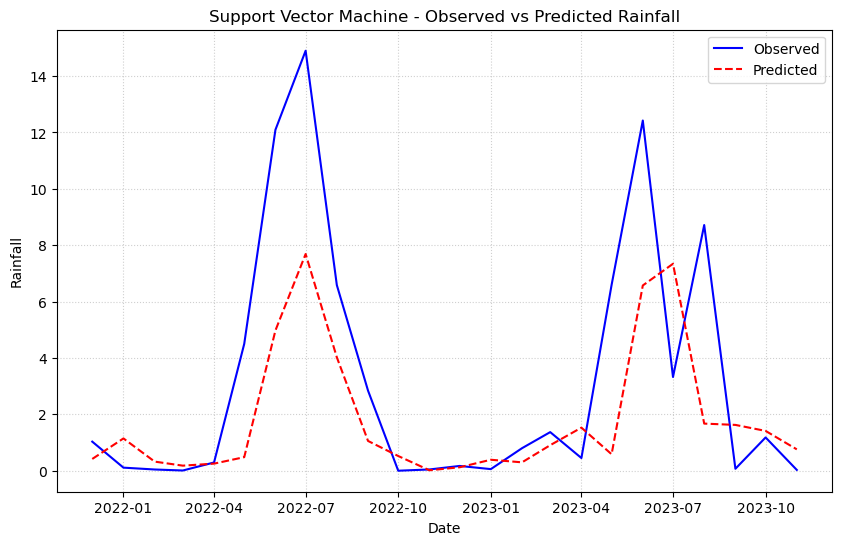

In [42]:
svm_model = SVR().fit(X_train, y_train)

# Make predictions and evaluate
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# RMSE and R-squared for SVM
train_rmse_svm = np.sqrt(mean_squared_error(y_train, y_pred_train_svm))
test_rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_test_svm))
train_r2_svm = r2_score(y_train, y_pred_train_svm)
test_r2_svm = r2_score(y_test, y_pred_test_svm)

# Print results for SVM
print("\nSupport Vector Machine:")
print(f"Training RMSE: {train_rmse_svm}")
print(f"Testing RMSE: {test_rmse_svm}")
print(f"Training R-squared: {train_r2_svm}")
print(f"Testing R-squared: {test_r2_svm}")

# Plot SVM results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Observed', color='blue')
plt.plot(y_test.index, y_pred_test_svm, label='Predicted', color='red', linestyle='dashed')
plt.title('Support Vector Machine - Observed vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()


## Hyparparmeter Tunning

In [43]:
# Model hyperparameter grids for GridSearchCV

param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Initialize models

dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
knn_model = KNeighborsRegressor()
svm_model = SVR()

# Perform GridSearchCV for each model
# Decision Tree
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)

# Random Forest
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

# K-Nearest Neighbors
grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

# Support Vector Machine
grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

# Print best hyperparameters and evaluate models
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for SVM:", grid_svm.best_params_)

# Make predictions with the best models
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
y_pred_svm = grid_svm.best_estimator_.predict(X_test)

# Calculate and display RMSE and R^2 for each model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}")

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Decision Tree - RMSE: 2.8120, R^2: 0.6039
Random Forest - RMSE: 2.7916, R^2: 0.6096
K-Nearest Neighbors - RMSE: 2.7373, R^2: 0.6246
Support Vector Machine - RMSE: 3.0748, R^2: 0.5264


## Adjusted Models

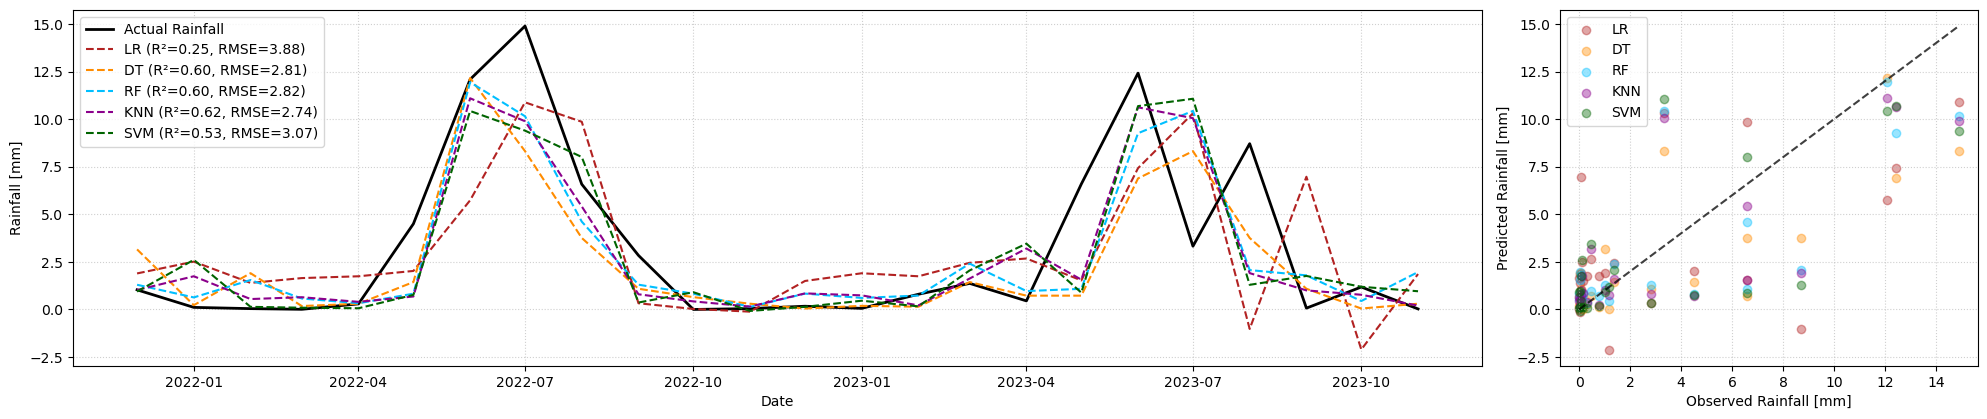

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

knn_model = KNeighborsRegressor(n_neighbors=7, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))


svm_model = SVR(C=10, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

# Create the figure with a grid of 2 rows and 3 columns
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2, 4)

# Left: Line plot of actual vs predicted for each model
ax1 = fig.add_subplot(gs[0, :3])
ax1.plot(y_test.index, y_test, label='Actual Rainfall', color='k', linewidth=2)
ax1.plot(y_test.index, y_pred_lr, label=f'LR (R²={r2_lr:.2f}, RMSE={rmse_lr:.2f})', color='firebrick', linestyle='--')
ax1.plot(y_test.index, y_pred_dt, label=f'DT (R²={r2_dt:.2f}, RMSE={rmse_dt:.2f})', color='darkorange', linestyle='--')
ax1.plot(y_test.index, y_pred_rf, label=f'RF (R²={r2_rf:.2f}, RMSE={rmse_rf:.2f})', color='deepskyblue', linestyle='--')
ax1.plot(y_test.index, y_pred_knn, label=f'KNN (R²={r2_knn:.2f}, RMSE={rmse_knn:.2f})', color='darkmagenta', linestyle='--')
ax1.plot(y_test.index, y_pred_svm, label=f'SVM (R²={r2_svm:.2f}, RMSE={rmse_svm:.2f})', color='darkgreen', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall [mm]')
# ax1.set_title('Rainfall Prediction: Actual vs Predicted (Multiple Models)')
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(loc='upper left')

# Right: Scatter plot of predicted vs observed for each model
ax2 = fig.add_subplot(gs[0, 3:])
ax2.scatter(y_test, y_pred_lr, label=f'LR', color='firebrick', alpha=0.4)
ax2.scatter(y_test, y_pred_dt, label=f'DT', color='darkorange', alpha=0.4)
ax2.scatter(y_test, y_pred_rf, label=f'RF', color='deepskyblue', alpha=0.4)
ax2.scatter(y_test, y_pred_knn, label=f'KNN', color='darkmagenta', alpha=0.4)
ax2.scatter(y_test, y_pred_svm, label=f'SVM', color='darkgreen', alpha=0.4)
ax2.plot([0, y_test.max()], [0, y_test.max()], "k--", alpha=0.75)  # Line of perfect agreement
ax2.set_xlabel("Observed Rainfall [mm]")
ax2.set_ylabel("Predicted Rainfall [mm]")
# ax2.set_title("Predicted vs Observed Rainfall (Scatter)")
ax2.legend(loc='upper left')
ax2.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

## Future Prediction

C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\somil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature nam

Predicted rainfall for the next 12 months:
Month 1: 0.20 mm
Month 2: 0.56 mm
Month 3: 1.42 mm
Month 4: 4.74 mm
Month 5: 11.02 mm
Month 6: 9.21 mm
Month 7: 4.41 mm
Month 8: 0.65 mm
Month 9: 0.14 mm
Month 10: 0.82 mm
Month 11: 1.80 mm
Month 12: 3.80 mm


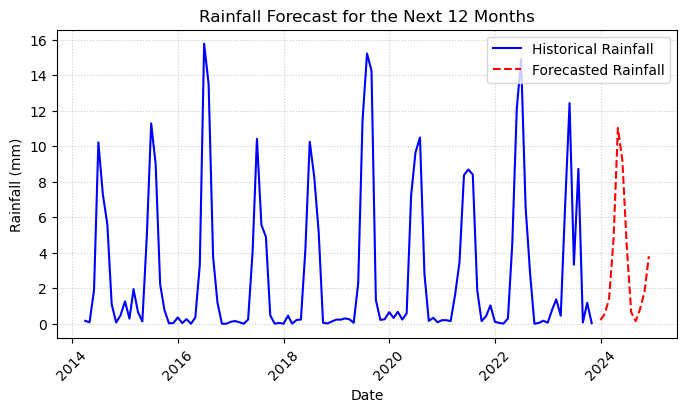

In [45]:
# Train a KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=7, weights='uniform')
model.fit(X_train, y_train)

# Use the last observed data to start the forecast for the next 12 months
last_values = df[['lag_1', 'lag_2', 'lag_3']].iloc[-1].values.reshape(1, -1)

# Prepare to store predictions
future_predictions = []

# Forecast the next 12 months
for i in range(12):
    next_pred = model.predict(last_values)[0]
    future_predictions.append(next_pred)
    
    # Update the last values for the next prediction
    last_values = np.array([next_pred, last_values[0][0], last_values[0][1]]).reshape(1, -1)

# Display forecasted values for the next 12 months
print("Predicted rainfall for the next 12 months:")
for month, prediction in enumerate(future_predictions, start=1):
    print(f"Month {month}: {prediction:.2f} mm")

# Plot historical data and the future predictions
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Rainfall'], label='Historical Rainfall', color='blue')
future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]  # Generate next 12 months
plt.plot(future_dates, future_predictions, label='Forecasted Rainfall', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Forecast for the Next 12 Months')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


## District-wise Plot (CG)

In [26]:
# Load the data
df = pd.read_csv('C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/monthly_mean_districtwiseCG.csv') 
df['Date'] = pd.to_datetime(df['Date'])

# Initialize list to store results
results = []

# Loop through each unique district
for district in df['District'].unique():
    # Filter data for the current district
    district_data = df[df['District'] == district].sort_values(by='Date')
    
    # Feature engineering: add lag features
    district_data['lag_1'] = district_data['Rainfall'].shift(1)
    district_data['lag_2'] = district_data['Rainfall'].shift(2)
    district_data['lag_3'] = district_data['Rainfall'].shift(3)
    
    # Drop missing values created by the shift
    district_data = district_data.dropna()
    
    # Define features (X) and target (y)
    X = district_data[['lag_1', 'lag_2', 'lag_3']]
    y = district_data['Rainfall']
    
    # Calculate the split index (80% for training)
    split_index = int(len(X) * 0.8)
    
    # Split the data into training and testing sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Initialize models
    lr_model = LinearRegression()
    dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2)
    rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
    knn_model = KNeighborsRegressor(n_neighbors=7, weights='uniform')
    svm_model = SVR(C=10, gamma='scale', kernel='rbf')
    
    # Dictionary to store R2 and RMSE for each model
    district_results = {'District': district}
    
    # Train and evaluate each model
    for model, name in [(lr_model, 'LR'), (dt_model, 'DT'), (rf_model, 'RF'), (knn_model, 'KNN'), (svm_model, 'SVM')]:
        # Fit model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate R-squared and RMSE
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Store results for each model in the current district
        district_results[f'R2_{name}'] = r2
        district_results[f'RMSE_{name}'] = rmse
    
    # Append district results to main list
    results.append(district_results)

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

# Save the result
results_df.to_csv('district_resultsCG.csv', index=False)


               District     R2_LR   RMSE_LR     R2_DT   RMSE_DT     R2_RF  \
0                Bastar  0.412348  4.144979  0.378380  4.263091  0.425350   
1               Bijapur  0.160796  6.907248  0.184901  6.807325  0.426154   
2             Bilashpur  0.510167  3.378366  0.597064  3.064086  0.697833   
3          Chhatishgarh  0.574343  2.967717  0.765491  2.202785  0.796908   
4        Dakshin Bastar  0.360860  4.625813  0.658064  3.383472  0.667034   
5              Dhamtari  0.446531  3.288263  0.645605  2.631259  0.646735   
6                  Durg  0.454900  3.405178  0.600881  2.913755  0.608250   
7        Janjgir_champa  0.383037  4.303956  0.666977  3.162099  0.633147   
8               Jashpur  0.388352  3.311798  0.623073  2.599811  0.604431   
9            Kabeerdham  0.419394  3.197686  0.497618  2.974486  0.627716   
10                Korba  0.595901  2.607162  0.486073  2.940188  0.601914   
11               Koriya  0.627817  2.096523  0.418354  2.620902  0.674262   

In [27]:
# Load the shapefile (replace with your path to the shapefile)
shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/Chhatisgarh.shp'  
gdf = gpd.read_file(shapefile_path)

# Assuming results_df contains RMSE and R-squared values for each district and model
# Merge the shapefile with the results DataFrame (assuming 'District' is the common column)
gdf = gdf.merge(results_df, left_on='District', right_on='District')

# Extract centroids from the district geometries
gdf['centroid'] = gdf.geometry.centroid

# Create a new GeoDataFrame for centroids
centroid_gdf = gpd.GeoDataFrame(
    gdf,  # This keeps the same data, but we will only keep the centroid and relevant columns
    geometry='centroid',
    crs=gdf.crs  # Retaining the same coordinate reference system
)

# Select the relevant columns: 'District', 'R2_LR', 'RMSE_LR', etc.
columns_to_keep = ['District', 'centroid', 'R2_LR', 'RMSE_LR', 'R2_DT', 'RMSE_DT', 'R2_RF', 'RMSE_RF', 'R2_KNN', 'RMSE_KNN', 'R2_SVM', 'RMSE_SVM']
centroid_gdf = centroid_gdf[columns_to_keep]

# Save the centroid GeoDataFrame as a new shapefile
output_shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidCG.shp'
centroid_gdf.to_file(output_shapefile_path)

print(f"Centroid shapefile with R² and RMSE saved at: {output_shapefile_path}")

Centroid shapefile with R² and RMSE saved at: C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidCG.shp


C:\Users\somil\AppData\Local\Temp\ipykernel_34352\460623913.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


C:\Users\somil\AppData\Local\Temp\ipykernel_34352\3751041671.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\somil\AppData\Local\Temp\ipykernel_34352\3751041671.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


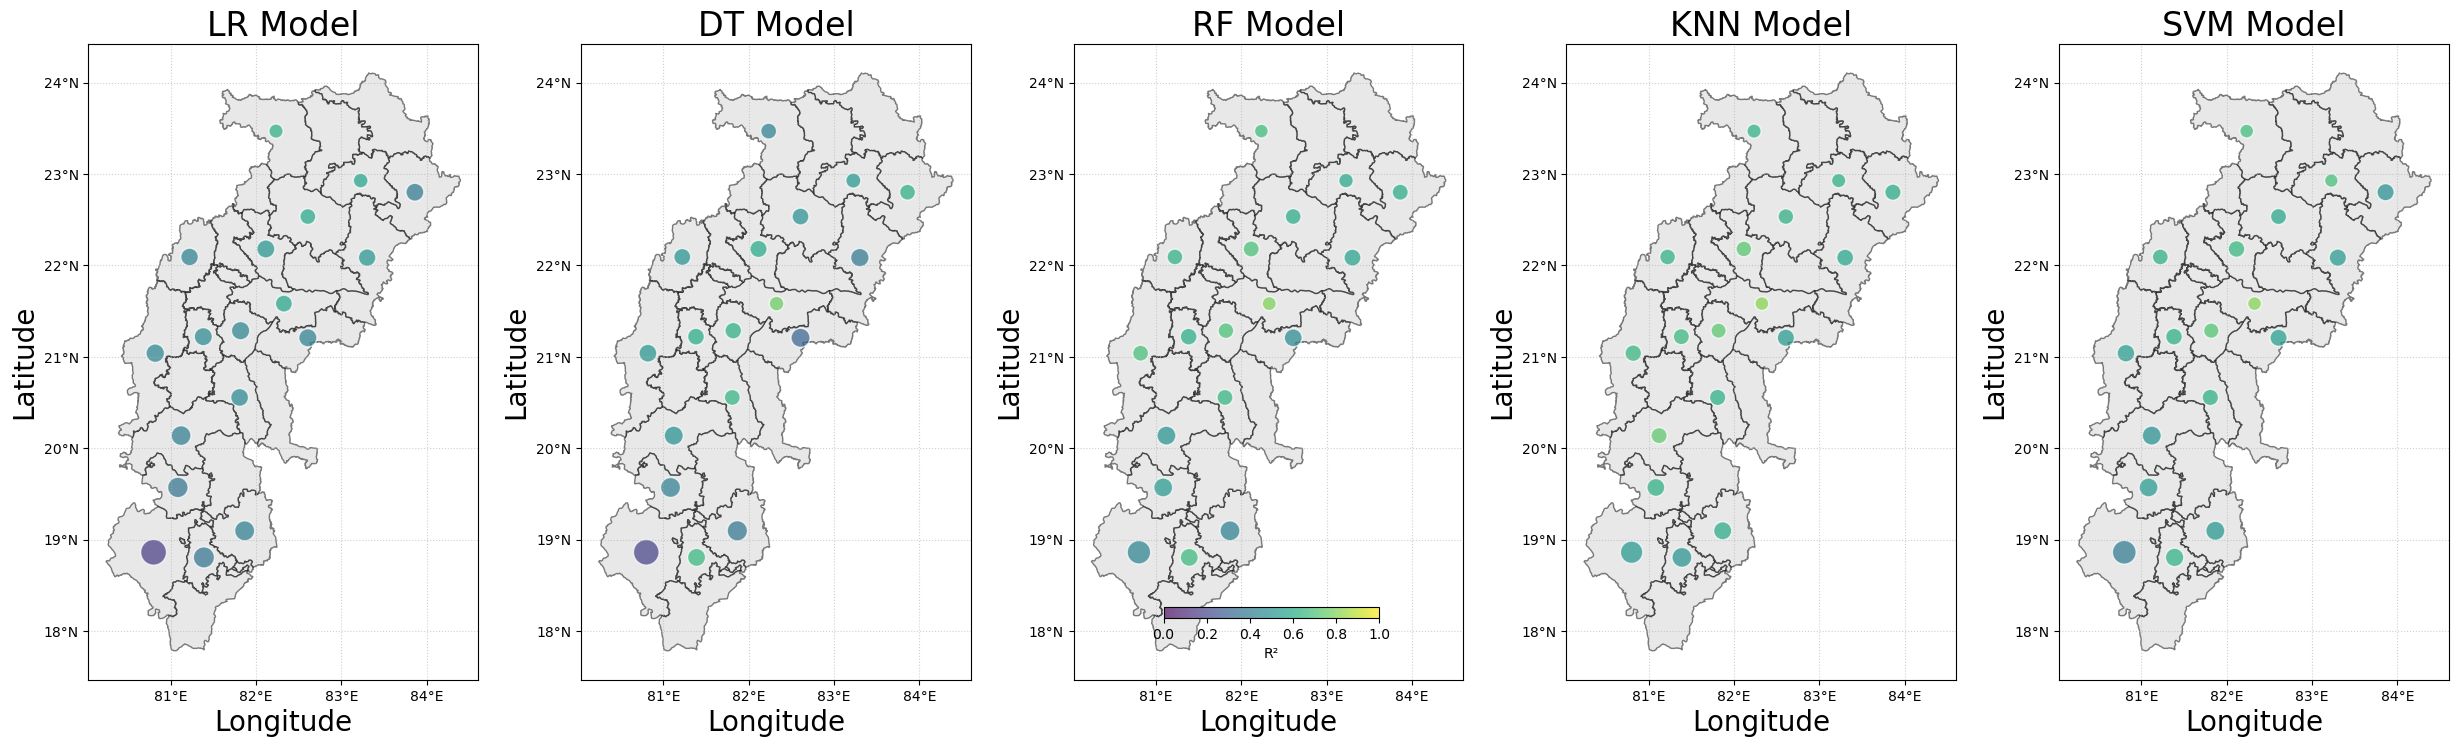

In [28]:
# Load the boundary shapefile for Chhattisgarh
shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/Chhatisgarh.shp'  
gdf_mp = gpd.read_file(shapefile_path)

# Load the centroid shapefile (containing R² and RMSE values)
centroid_shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidCG.shp'
gdf_centroids = gpd.read_file(centroid_shapefile_path)

# Create a figure with subplots (one for each model)
fig, axes = plt.subplots(1, 5, figsize=(25, 7))  # 1 row, 5 columns

# Define model names and columns for R² and RMSE
models = ['LR', 'DT', 'RF', 'KNN', 'SVM']

# Normalize R² values for color mapping (R² should be between 0 and 1)
norm = Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap('viridis')

# Loop through the models and create a bubble plot for each
for i, model in enumerate(models):
    ax = axes[i]  # Get the axis for the current model
    
    # Get R² and RMSE for the current model
    r2_col = f'R2_{model}'
    rmse_col = f'RMSE_{model}'

    # Plot the Chhattisgarh boundary on the current subplot
    gdf_mp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

    # Scatter plot for centroids, with bubble size proportional to RMSE and color by R²
    scatter = ax.scatter(
        gdf_centroids.geometry.x,  # Longitude of centroid
        gdf_centroids.geometry.y,  # Latitude of centroid
        s=gdf_centroids[rmse_col] * 50,  # Bubble size (scaled for visualization)
        c=gdf_centroids[r2_col],  # Color by R² value
        cmap=cmap,  # Colormap for R²
        norm=norm,  # Normalize the R² values
        edgecolors="w",  # White border for bubbles
        alpha=0.7  # Slight transparency for better visualization
    )

    # Set plot title and labels
    ax.set_title(f'{model} Model', fontsize=24)
    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Latitude', fontsize=20)
    ax.grid(True, linestyle=':', alpha=0.6)

    # Format longitude (E) and latitude (N) labels without decimals
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{abs(int(x))}°{"E" if x > 0 else "W"}'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{abs(int(y))}°{"N" if y > 0 else "S"}'))

# Add color bar for R² values (applies to all subplots)
fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1, label='R²')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## District-wise Plot (MP)

In [29]:
# Load the data
df = pd.read_csv('C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/monthly_mean_districtwiseMP.csv') 
df['Date'] = pd.to_datetime(df['Date'])

# Initialize list to store results
results = []

# Loop through each unique district
for district in df['District'].unique():
    # Filter data for the current district
    district_data = df[df['District'] == district].sort_values(by='Date')
    
    # Feature engineering: add lag features
    district_data['lag_1'] = district_data['Rainfall'].shift(1)
    district_data['lag_2'] = district_data['Rainfall'].shift(2)
    district_data['lag_3'] = district_data['Rainfall'].shift(3)
    
    # Drop missing values created by the shift
    district_data = district_data.dropna()
    
    # Define features (X) and target (y)
    X = district_data[['lag_1', 'lag_2', 'lag_3']]
    y = district_data['Rainfall']
    
    # Calculate the split index (80% for training)
    split_index = int(len(X) * 0.8)
    
    # Split the data into training and testing sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Initialize models
    lr_model = LinearRegression()
    dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2)
    rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
    knn_model = KNeighborsRegressor(n_neighbors=7, weights='uniform')
    svm_model = SVR(C=10, gamma='scale', kernel='rbf')
    
    # Dictionary to store R2 and RMSE for each model
    district_results = {'District': district}
    
    # Train and evaluate each model
    for model, name in [(lr_model, 'LR'), (dt_model, 'DT'), (rf_model, 'RF'), (knn_model, 'KNN'), (svm_model, 'SVM')]:
        # Fit model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate R-squared and RMSE
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Store results for each model in the current district
        district_results[f'R2_{name}'] = r2
        district_results[f'RMSE_{name}'] = rmse
    
    # Append district results to main list
    results.append(district_results)

# Convert results to DataFrame for easy comparison
results_MP = pd.DataFrame(results)
print(results_MP)

# Save the result
results_df.to_csv('district_resultsMP.csv', index=False) 

       District     R2_LR   RMSE_LR     R2_DT   RMSE_DT     R2_RF   RMSE_RF  \
0     Alirajpur  0.035320  4.169484 -0.043973  4.337458  0.245809  3.686646   
1       Anuppur  0.672835  2.409043  0.751344  2.100199  0.789297  1.933289   
2      Balaghat  0.504515  3.462078  0.693081  2.724794  0.664527  2.848722   
3       Barwani  0.118317  3.590049  0.068698  3.689686  0.283253  3.236883   
4         Bhind  0.548624  2.031365  0.617399  1.870215  0.645107  1.801222   
5        Bhopal  0.450921  4.751498  0.790717  2.933459  0.770891  3.069262   
6     Burhanpur  0.093700  4.485716  0.282715  3.990630  0.442685  3.517598   
7    Chhatarpur  0.374769  2.649107  0.150961  3.087045  0.083937  3.206579   
8    Chhindwara  0.536591  3.921636  0.527542  3.959740  0.688498  3.215254   
9         Damoh  0.524101  3.054905  0.463757  3.242807  0.763654  2.152852   
10        Datia  0.548550  2.095435  0.522610  2.154794  0.526547  2.145891   
11        Dewas  0.216362  5.507805  0.305886  5.183

In [30]:
# Load the shapefile 
shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/MadhyaPradesh.shp'  
gdf = gpd.read_file(shapefile_path)

# Assuming results_df contains RMSE and R-squared values for each district and model
# Merge the shapefile with the results DataFrame (assuming 'District' is the common column)
gdf = gdf.merge(results_MP, left_on='District', right_on='District')

# Extract centroids from the district geometries
gdf['centroid'] = gdf.geometry.centroid

# Create a new GeoDataFrame for centroids
centroid_gdf = gpd.GeoDataFrame(
    gdf,  # This keeps the same data, but we will only keep the centroid and relevant columns
    geometry='centroid',
    crs=gdf.crs  # Retaining the same coordinate reference system
)

# Select the relevant columns: 'District', 'R2_LR', 'RMSE_LR', etc.
columns_to_keep = ['District', 'centroid', 'R2_LR', 'RMSE_LR', 'R2_DT', 'RMSE_DT', 'R2_RF', 'RMSE_RF', 'R2_KNN', 'RMSE_KNN', 'R2_SVM', 'RMSE_SVM']
centroid_gdf = centroid_gdf[columns_to_keep]

# Save the centroid GeoDataFrame as a new shapefile
output_shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidMP.shp'
centroid_gdf.to_file(output_shapefile_path)

print(f"Centroid shapefile with R² and RMSE saved at: {output_shapefile_path}")

Centroid shapefile with R² and RMSE saved at: C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidMP.shp


C:\Users\somil\AppData\Local\Temp\ipykernel_34352\2598627375.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


C:\Users\somil\AppData\Local\Temp\ipykernel_34352\931198030.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\somil\AppData\Local\Temp\ipykernel_34352\931198030.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


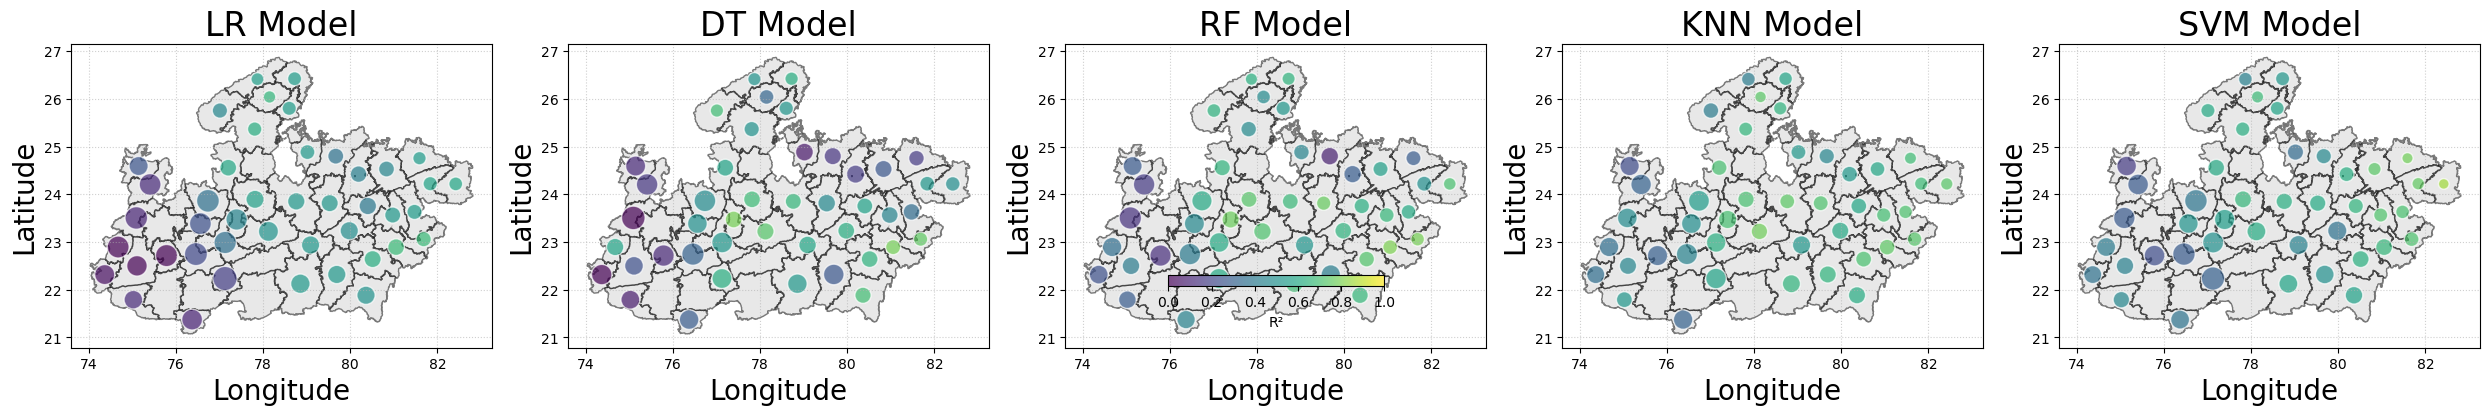

In [31]:
# Load the boundary shapefile for Madhya Pradesh
shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/MadhyaPradesh.shp'  
gdf_mp = gpd.read_file(shapefile_path)

# Load the centroid shapefile (containing R² and RMSE values)
centroid_shapefile_path = 'C:/Users/somil/OneDrive/Desktop/Mypywork/CourseWork/DSE615/centroidMP.shp'
gdf_centroids = gpd.read_file(centroid_shapefile_path)

# Create a figure with subplots (one for each model)
fig, axes = plt.subplots(1, 5, figsize=(25, 7))  # 1 row, 5 columns

# Define model names and columns for R² and RMSE
models = ['LR', 'DT', 'RF', 'KNN', 'SVM']

# Normalize R² values for color mapping (R² should be between 0 and 1)
norm = Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap('viridis')

# Loop through the models and create a bubble plot for each
for i, model in enumerate(models):
    ax = axes[i]  # Get the axis for the current model
    
    # Get R² and RMSE for the current model
    r2_col = f'R2_{model}'
    rmse_col = f'RMSE_{model}'

    # Plot the Madhya Pradesh boundary on the current subplot
    gdf_mp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

    # Scatter plot for centroids, with bubble size proportional to RMSE and color by R²
    scatter = ax.scatter(
        gdf_centroids.geometry.x,  # Longitude of centroid
        gdf_centroids.geometry.y,  # Latitude of centroid
        s=gdf_centroids[rmse_col] * 50,  # Bubble size (scaled for visualization)
        c=gdf_centroids[r2_col],  # Color by R² value
        cmap=cmap,  # Colormap for R²
        norm=norm,  # Normalize the R² values
        edgecolors="w",  # White border for bubbles
        alpha=0.7  # Slight transparency for better visualization
    )

    # Set plot title and labels
    ax.set_title(f'{model} Model', fontsize=24)
    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Latitude', fontsize=20)
    ax.grid(True, linestyle=':', alpha=0.6)

# Add color bar for R² values (applies to all subplots)
fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1, label='R²')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
